___


# RNN Exercise



```
```

**IMPORTING BASIC LIBRALIES**

In [2]:

import pandas as pd
from google.colab import files
data_to_load = files.upload()
import io
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


Saving Frozen_Dessert_Production.csv to Frozen_Dessert_Production.csv


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**UPLOADING THE "Frozen_Dessert_Production.csv" from my device to Google colablartory. set the date to a datetime index columns**

In [3]:
df = pd.read_csv(io.BytesIO(data_to_load['Frozen_Dessert_Production.csv']),parse_dates=True, index_col = "DATE")

In [4]:
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


**Change the column name to Production**

In [5]:
df.rename(columns={'IPN31152N': 'Production'},inplace=True)

**Plotting out the time series**

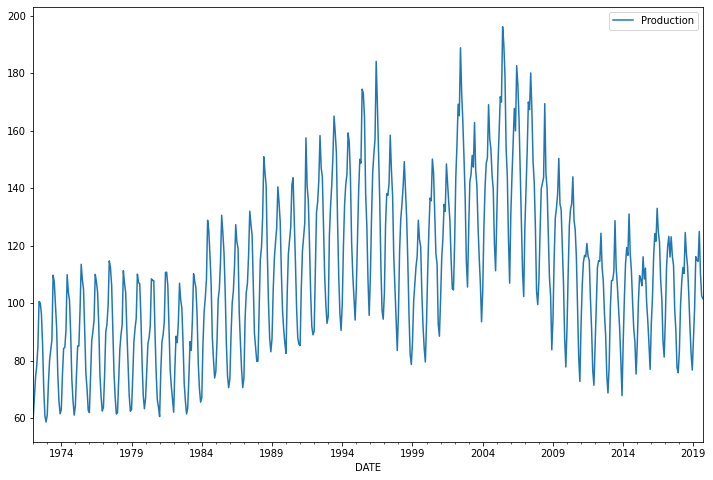

In [6]:
df.plot(figsize =(12,8))

## Train Test Split

**Figure out the length of the data set**

In [7]:

len(df)

573

**Split the data into a train/test split where the test set is the last 18 months of data.**

In [618]:
test_spot = 18

In [619]:
test_index = int(len(df)-test_spot)

In [620]:
test_index

555

In [621]:
train = df[:test_index]
test = df[test_index:]

In [622]:
train

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343


In [623]:
test

,Production
DATE,
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841
2018-07-01,117.2215
2018-08-01,112.6779
2018-09-01,103.3118
2018-10-01,92.1321
2018-11-01,82.4347
2018-12-01,76.7608


## Scale Data

**Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [624]:
from sklearn.preprocessing import MinMaxScaler

In [625]:
scaler = MinMaxScaler()

In [626]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**Create a TimeSeriesGenerator object based off the scaled_train data. The batch length here is 1, and length = 12.**

In [627]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [628]:
len(test)

18

In [629]:
length= 12
generator =  TimeseriesGenerator(scaled_train, scaled_train, length= length, batch_size = 1)

In [630]:
X,y = generator[0]

In [631]:
X

array([[[0.00947104],
        [0.06108982],
        [0.11326273],
        [0.14145625],
        [0.18982663],
        [0.30495972],
        [0.30154406],
        [0.27416065],
        [0.19736841],
        [0.08532665],
        [0.01561588],
        [0.        ]]])

In [632]:
y

array([[0.01774221]])

In [633]:
scaled_train

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

### Create the Model

**Create a Keras Sequential Model with as many LSTM units and a final Dense Layer.**

In [634]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [635]:
n_features = 1
model = Sequential()
model.add(LSTM(100, activation= "relu", input_shape =(length, n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")

In [636]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**Create an EarlyStopping callback based on val_loss.**
(I found the patience = 2 performs well)

In [637]:
from tensorflow.keras.callbacks import EarlyStopping

In [638]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

**Fit the model to the generator, let the EarlyStopping dictate the amount of epochs.**

In [639]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size =1)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size=1)

In [640]:
model.fit_generator(generator, epochs = 20, validation_data= validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
543/543 [==============================] - 3s 5ms/step - loss: 0.0215 - val_loss: 0.0016
Epoch 2/20
543/543 [==============================] - 3s 5ms/step - loss: 0.0069 - val_loss: 0.0013
Epoch 3/20
543/543 [==============================] - 3s 5ms/step - loss: 0.0059 - val_loss: 0.0020
Epoch 4/20
543/543 [==============================] - 3s 5ms/step - loss: 0.0047 - val_loss: 0.0014


**Plot the history of the loss that occured during training.**

In [641]:
losses = pd.DataFrame(model.history.history)

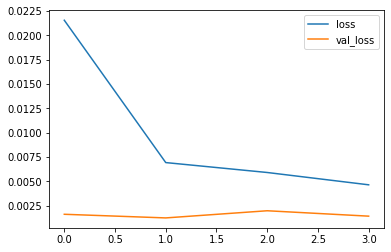

In [642]:
losses.plot()

## Evaluate on Test Data

**Forecast predictions for the test data range (the last 18 months of the entire dataset). Remember to inverse scaling transformations. Final result should be a DataFrame with two columns, the true test values and the predictions.**

In [643]:
import numpy as np

test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

In [644]:
true_predictions = scaler.inverse_transform(test_predictions)

In [645]:
test["Predictions"] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [646]:
test

,Production,Predictions
DATE,,
2018-04-01,112.4309,113.518378
2018-05-01,110.3544,117.050690
2018-06-01,124.5841,118.279656
2018-07-01,117.2215,115.328936
2018-08-01,112.6779,108.230869
2018-09-01,103.3118,96.332320
2018-10-01,92.1321,86.029976
2018-11-01,82.4347,79.585961
2018-12-01,76.7608,79.055377


**Plotting my predictions versus the True test values.**

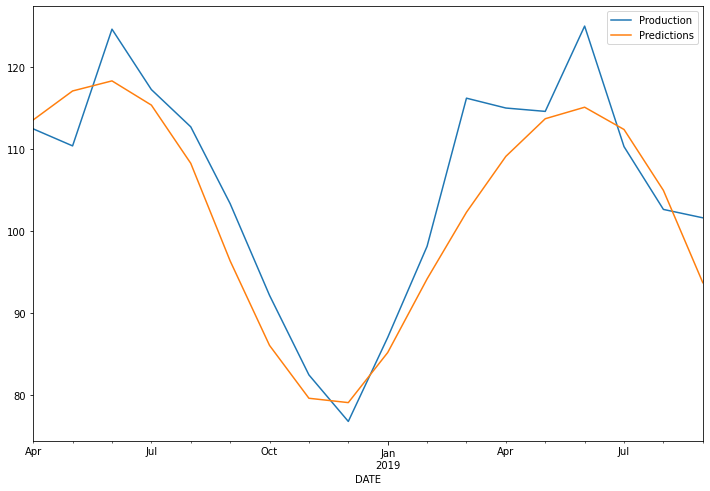

In [647]:
test.plot(figsize=(12,8))

**Calculate your RMSE.**

In [649]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test["Production"], test["Predictions"]))

5.900919173329116

**The Project is not finished here. I will try to play with the parameters in future more to reduce the RMSE .**